In [131]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [132]:
img_paths=glob.glob("Vehicules1024/*_co*")

In [133]:
anno_paths=glob.glob("Annotations1024/00*")

In [134]:
def draw_angled_bb(img,x1,y1,x2,y2,x3,y3,x4,y4,colour):
    cv2.line(img,(x1,y1),(x2,y2),colour,2)
    cv2.line(img,(x2,y2),(x3,y3),colour,2)
    cv2.line(img,(x3,y3),(x4,y4),colour,2)
    cv2.line(img,(x4,y4),(x1,y1),colour,2)

In [153]:
data=[]
for anno in anno_paths:
    with open(anno,"r") as file:
        for line in file.readlines():
            x=line.strip().split()
            x.append(anno.split("/")[1].split(".")[0])
            data.append(x)
data=pd.DataFrame(data)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
884,795.339150,573.118638,-2.314896,11,1,0,787,816,804,775,554,584,593,560,00000284
3173,659.450109,762.660691,3.082139,11,1,0,638,681,680,639,758,755,768,770,00000246
2966,453.392710,295.950740,-1.516502,9,1,0,446,463,462,442,272,274,319,319,00001270
932,316.354928,884.140189,3.093437,1,1,0,295,336,338,296,878,874,892,892,00000896
1259,967.539956,866.079127,2.193996,1,1,0,974,984,964,948,846,854,885,879,00001118
1631,927.875319,812.560158,-2.420622,11,1,0,919,949,940,904,795,824,830,801,00000160
3363,911.462808,299.662212,1.313473,1,1,0,907,926,915,898,321,317,280,282,00000615
3579,673.672292,105.170609,1.220941,1,1,0,660,674,689,672,89,84,122,125,00000090
784,70.676117,443.121610,-1.467715,23,1,0,59,78,85,61,464,466,422,421,00000431
1879,745.184102,605.515171,-0.051901,11,1,0,723,764,765,729,600,596,613,613,00001107


In [154]:
data=data.dropna()
data[14]="Vehicules1024/"+data[14]+"_co.png"

In [155]:
cols=[6,7,8,9,10,11,12,13]
for col in cols:
    data[col]=data[col].apply(lambda x: "0" if "-" in x else x)
data[data[10].str.contains("-")]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14


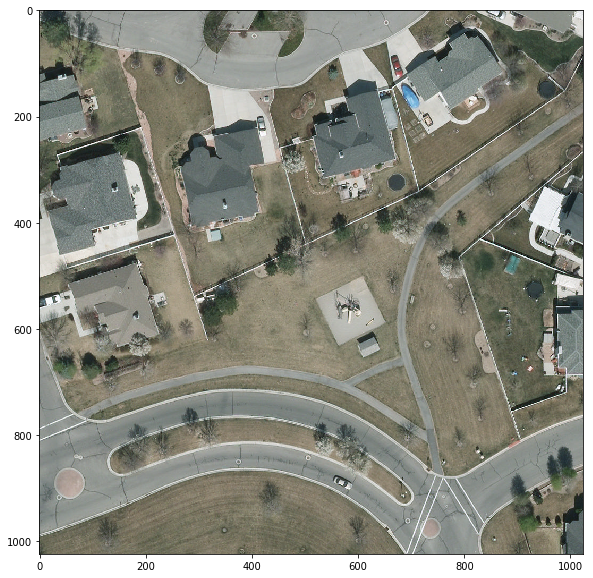

In [158]:
# img_path=np.random.choice(img_paths)
img_path='Vehicules1024/00000090_co.png'
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
code=img_path.split("/")[1].split("_")[0]
plt.figure(figsize=(16,10))
plt.imshow(img)

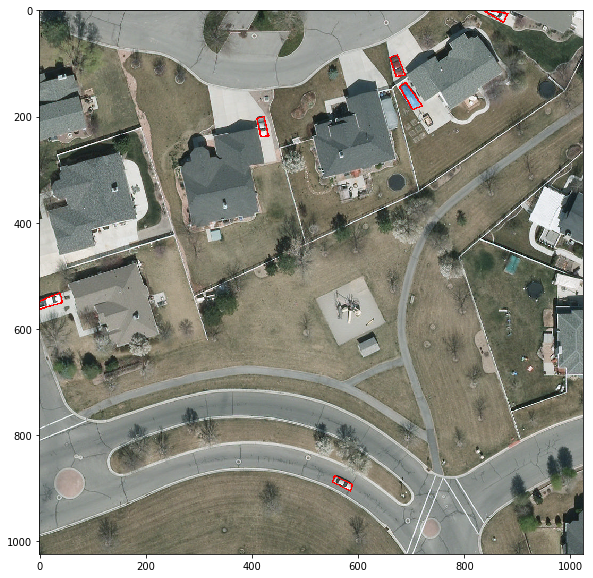

In [163]:
text=data.loc[data[14]==img_path]
img_ang=img.copy()
for line in text.values:
    x1,x2,x3,x4,y1,y2,y3,y4=list(map(int,line[-9:-1]))
    draw_angled_bb(img_ang,x1,y1,x2,y2,x3,y3,x4,y4,colour=(255,0,0))
plt.figure(figsize=(16,10))
plt.imshow(img_ang)

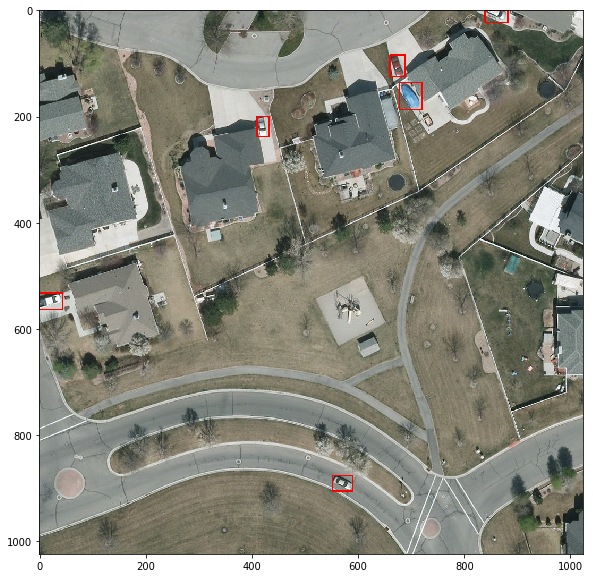

In [164]:
img_bb=img.copy()
for line in text.values:
    x1,x2,x3,x4,y1,y2,y3,y4=list(map(int,line[-9:-1]))
    cv2.rectangle(img_bb,(min([x1,x2,x3,x4]),min([y1,y2,y3,y4])),(max([x1,x2,x3,x4]),max([y1,y2,y3,y4])),(255,0,0),2)
plt.figure(figsize=(16,10))
plt.imshow(img_bb)

In [162]:
data[data[14]==img_path]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
3579,673.672292,105.170609,1.220941,1,1,0,660,674,689,672,89,84,122,125,Vehicules1024/00000090_co.png
3580,697.942458,161.841448,-2.142715,23,1,1,678,690,721,703,144,136,180,187,Vehicules1024/00000090_co.png
3581,860.679153,5.111332,0.503399,1,0,0,839,874,882,848,2,23,6,0,Vehicules1024/00000090_co.png
3582,420.482944,219.769658,1.349147,1,1,0,410,423,432,417,204,200,237,238,Vehicules1024/00000090_co.png
3583,15.547503,548.487070,-0.271938,11,0,0,39,44,0,0,532,550,563,548,Vehicules1024/00000090_co.png
3584,571.340631,890.528681,0.463648,1,1,0,556,590,586,552,876,893,905,888,Vehicules1024/00000090_co.png


In [113]:
cv2.imwrite("nigg.jpg",img_bb)

True

In [167]:
line

array(['94.023493', '969.401819', '1.145347', '2', '1', '0', '120', '97',
       '70', '89', '997', '1006', '940', '935',
       'Vehicules1024/00000102_co.png'], dtype=object)

In [169]:
kara_biberim=[]
for line in data.values:
    vur_kadehleri=[]
    vur_kadehleri.append(line[-1])
    x1,x2,x3,x4,y1,y2,y3,y4=list(map(int,line[-9:-1]))
    vur_kadehleri.append(min(x1,x2,x3,x4))
    vur_kadehleri.append(min(y1,y2,y3,y4))
    vur_kadehleri.append(max(x1,x2,x3,x4))
    vur_kadehleri.append(max(y1,y2,y3,y4))
    vur_kadehleri.append("arac")
    kara_biberim.append(vur_kadehleri)
kara_biberim=pd.DataFrame(kara_biberim)

In [ ]:
kara_biberim.to_csv()